# Big Data Mart Sales Prediction
Problem Statement : The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import scipy as stats
%matplotlib inline
warnings.filterwarnings('ignore')

First We will deal with Train  data

In [2]:
# importing train data
train_df = pd.read_csv("bigdatamart_Train.csv")
train_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
train_df.shape# shape pf the data

(8523, 12)

In [4]:
train_df.dtypes # find the datatypes of our features


Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

There are object type, float64 type and int64 type data is present, so we will have to deal object type we will do the same later

In [5]:
# To get good overview of the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
train_df.nunique()# Checking number of unique values in each column

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

so we can find out that tere are few features are catogorical and few features are discreate and our label Item_Outlet_Sale is cotinouse , So our problem is regression

In [7]:
# Checking null values in the train dataset
train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are so many missing values in the features Item_Weight and Outlet_Size. Here Item_Weight is a numerical data so we will use mean or median method to fill these null values and Outlet_Size is a categorical data so we will use mode method to fill the null values. We will treat this missing values in the later part.

<AxesSubplot:>

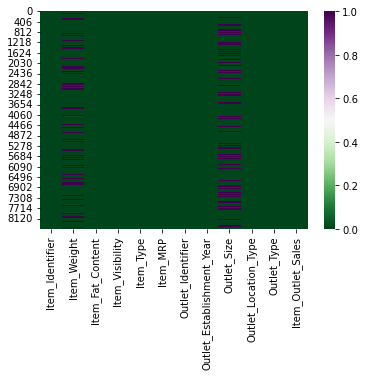

In [19]:
sns.heatmap(train_df.isnull(),cmap='PRGn_r') # visualize the null vallues

In [20]:
# Checking how many columns are there in the dataset
train_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

array([3735.138 ,  443.4228, 2097.27  , ..., 7182.6504, 3608.636 ,
       2778.3834])

In [22]:
# Checking count of outlet sales 
train_df["Item_Outlet_Sales"].value_counts()

958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650     1
5602.7070     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

In [24]:
# Checking wheather the dataset contains any space
train_df.loc[train_df['Item_Outlet_Sales']==" "]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [25]:
# let us obtain the statistical description of our data
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Here we can observe the count of the feature Item_Weight has 7060 which means there are missing values present. 

Now we weill deal with missing data in features, ie Iltem_Weight and Outlet_Size

In [32]:
train_df['Item_Weight'].isnull().sum()

1463

In [40]:
train_df['Item_Weight'].value_counts()

12.857645    1463
12.150000      86
17.600000      82
13.650000      77
11.800000      76
             ... 
7.275000        2
7.685000        1
9.420000        1
6.520000        1
5.400000        1
Name: Item_Weight, Length: 416, dtype: int64

In [41]:
# The Value is in between 4.55 to 21.35(from describe function), is continuuse so we will replace the data by mean() function
train_df['Item_Weight']= train_df['Item_Weight'].fillna(train_df['Item_Weight'].mean())

In [42]:
# check any value missing
train_df['Item_Weight'].isnull().sum()

0

In [43]:
#now check Outlet_size
train_df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

As this is a catogorical feature we will deal with mode (most occured dataor repeated data)

In [46]:
train_df['Outlet_Size']=train_df['Outlet_Size'].fillna(train_df['Outlet_Size'].mode()[0])

In [47]:
train_df['Outlet_Size'].isnull().sum()

0

# Visualization

In [48]:
# 1st we will deal with catogorical data

In [49]:
# Checking value count of Item_Fat_Content
print(train_df["Item_Fat_Content"].value_counts())

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


While seeing these value we can assume that Low Fat, LF, low fat are same, similarly Regular and reg are same so we make them one

In [50]:
train_df["Item_Fat_Content"]=train_df["Item_Fat_Content"].replace('LF','Low Fat')
train_df["Item_Fat_Content"]=train_df["Item_Fat_Content"].replace('low fat','Low Fat')
train_df["Item_Fat_Content"]=train_df["Item_Fat_Content"].replace('reg','Regular')

In [51]:
# checking the value counts
train_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

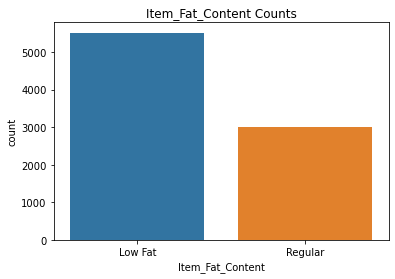

In [52]:
sns.countplot(train_df["Item_Fat_Content"])
plt.title("Item_Fat_Content Counts")
plt.show()

Clearly we can note that the number of Low fat product is much higher than regular. So  most customers prefer low fat item over regular

In [53]:
# Let's check the value count of Item_Type
train_df["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

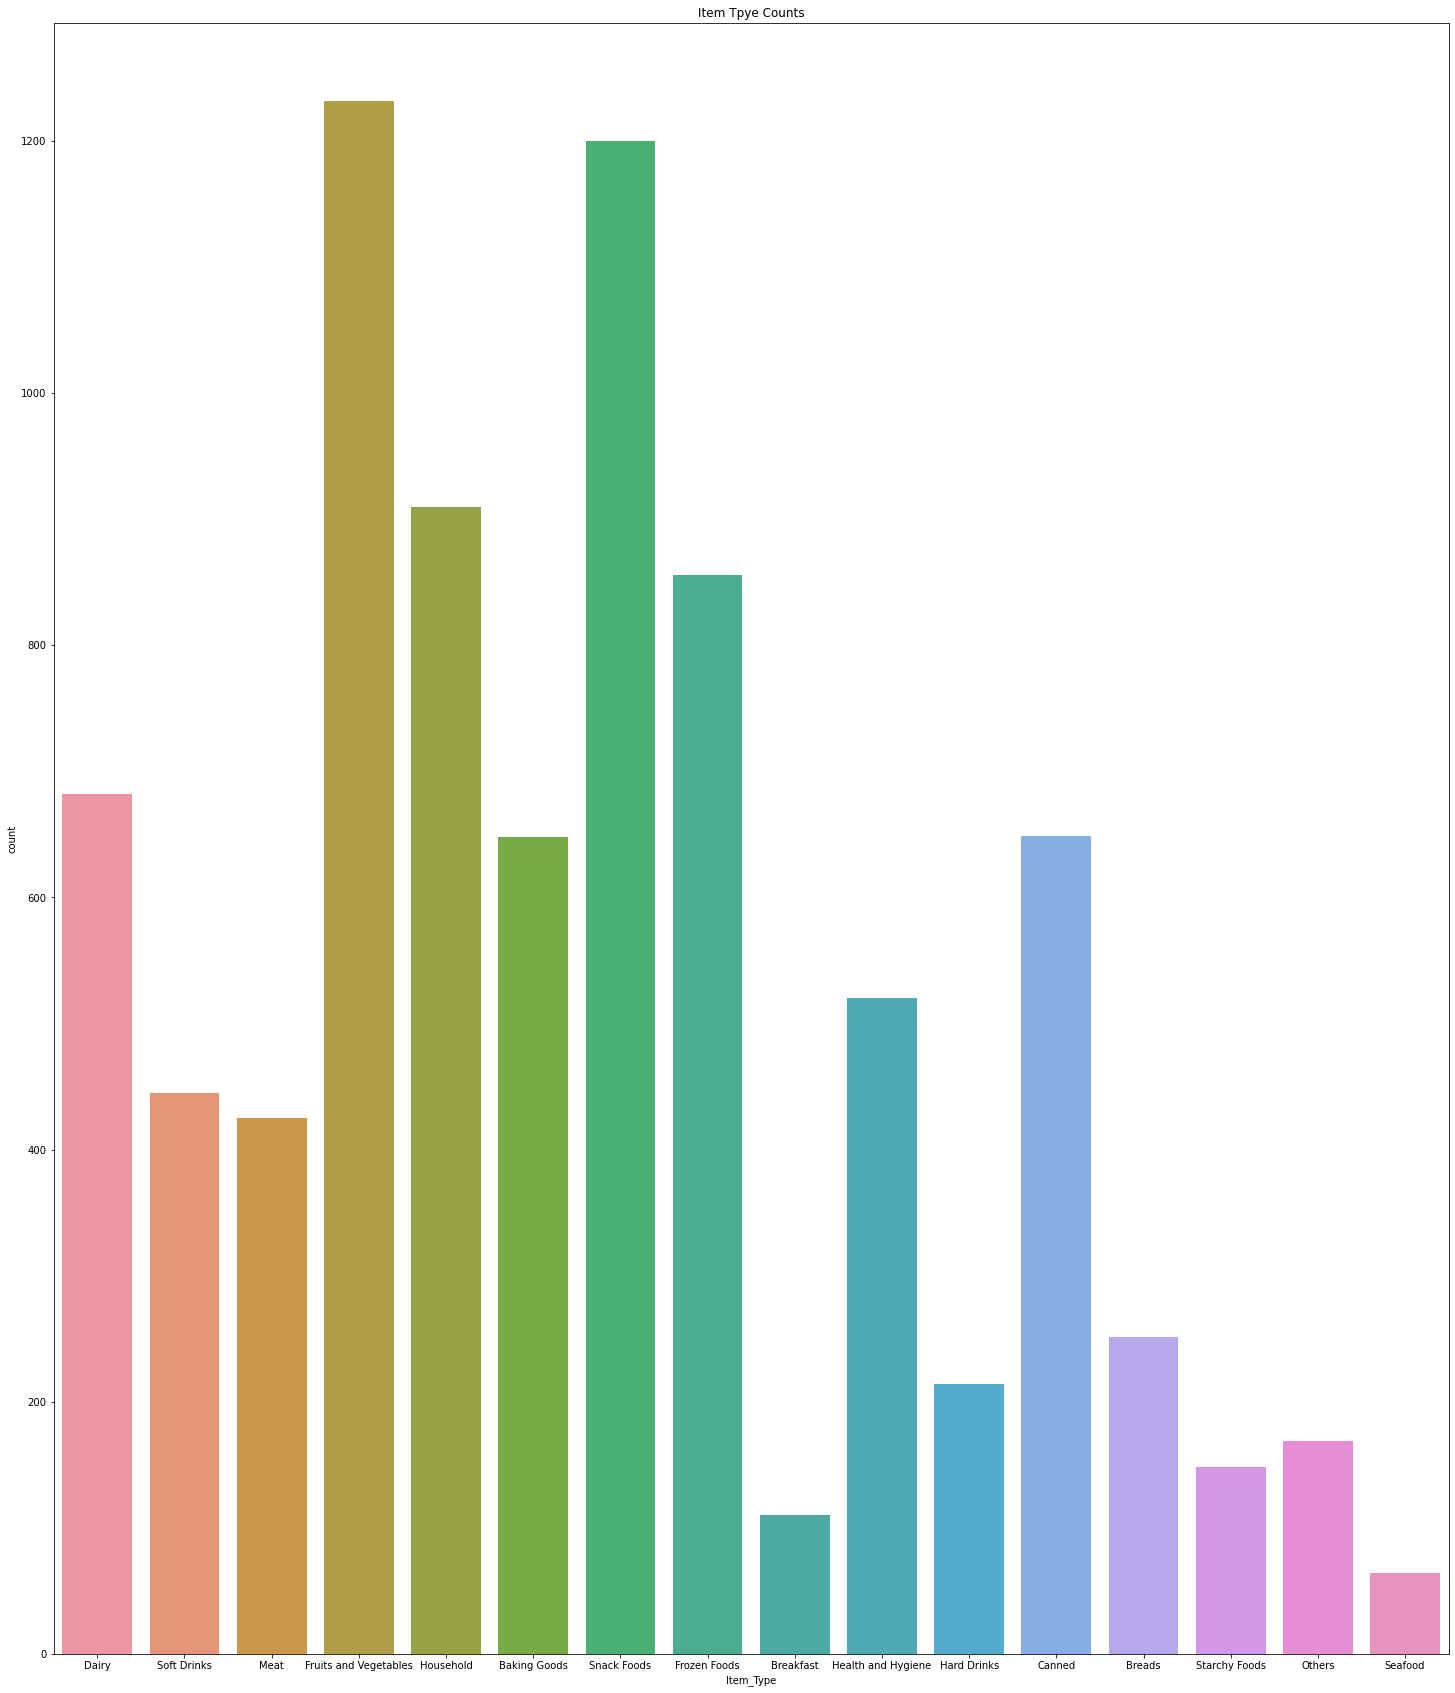

In [58]:
plt.figure(figsize=(25,30))
sns.countplot(train_df['Item_Type'])
plt.title("Item Tpye Counts")
plt.show()

Fruit and vegetables and snakc food are much favourites

In [59]:
#Visualize the count of Outlet_Size
print(train_df["Outlet_Size"].value_counts())

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64


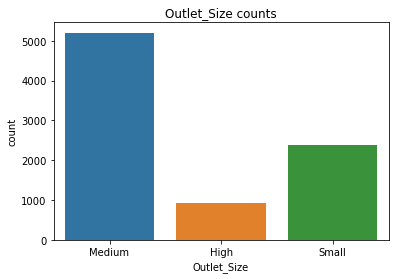

In [60]:
sns.countplot(train_df["Outlet_Size"])
plt.title('Outlet_Size counts')
plt.show()

numbare of medium stores are high compared to small, lease High out let size

In [61]:
#Visualize the count of Outlet_Location_Type
print(train_df["Outlet_Location_Type"].value_counts())

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


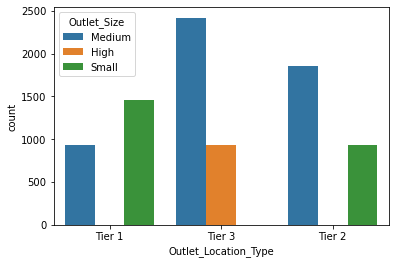

In [64]:
sns.countplot(x='Outlet_Location_Type',hue='Outlet_Size',data=train_df)
plt.show()

    number of stall are equaly located in all locations , but High_outlet_size stalls are located only in tier 3 which means tier 3 will be mtro area

In [65]:
# Checking the value count of Outlet_Type
print(train_df["Outlet_Type"].value_counts())

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


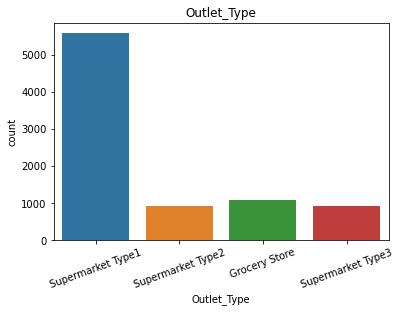

In [71]:
#Visualize the count of Outlet_Type
sns.countplot(x="Outlet_Type",data=train_df)
plt.title('Outlet_Type')
plt.xticks(rotation=20)
plt.show()

Supermarket Type one has high number compared to others, we have to deal with later

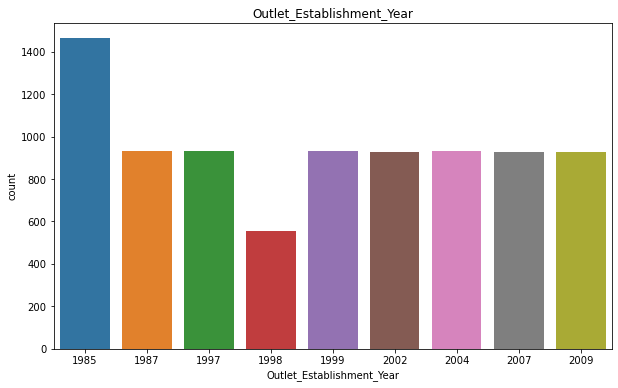

In [72]:
#Now plotig Numerical value that year of establishment
plt.figure(figsize=(10,6))
sns.countplot(x='Outlet_Establishment_Year',data=train_df)
plt.title('Outlet_Establishment_Year')
plt.show()

From this we can note that the super market established in 1985 have high numbers

<Figure size 1800x2160 with 0 Axes>

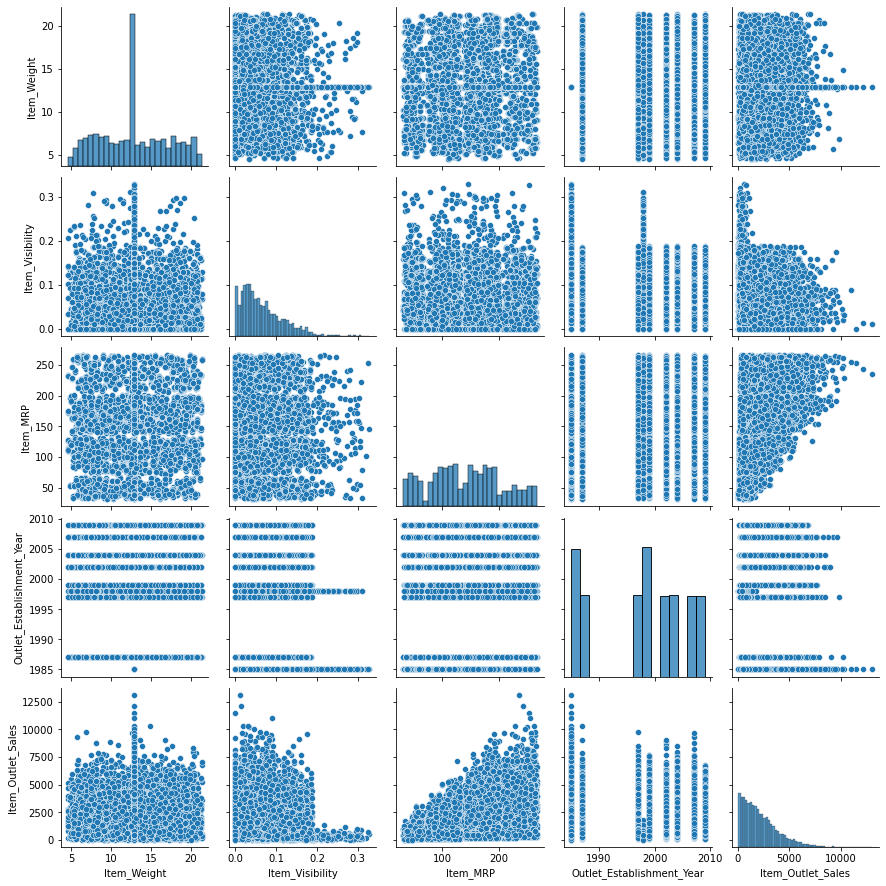

In [73]:
#Now we will plot pair plot
plt.figure(figsize=(25,30))
sns.pairplot(train_df)

From this we can notice not much multicolinearity between items

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

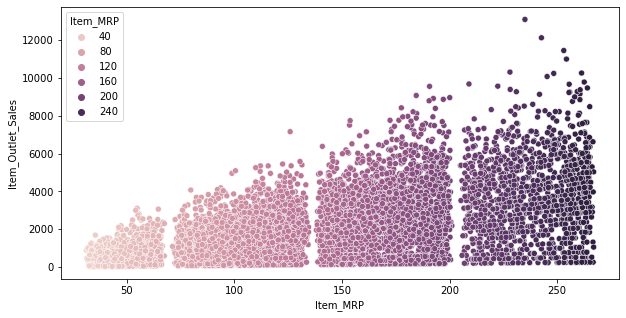

In [77]:
# Let's visualize all the features relationship with target variable
plt.figure(figsize=(10,5))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue="Item_MRP",data=train_df)

As the price increases the item sales increases this means both are correlated with each other. 

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

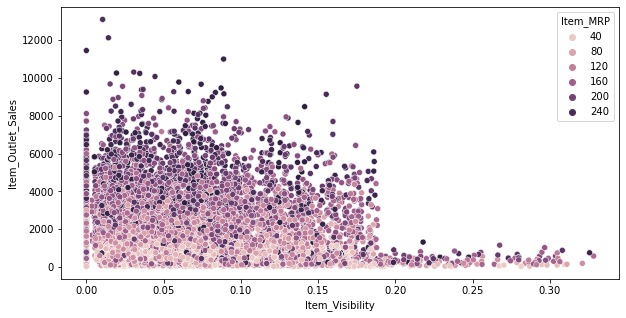

In [79]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue="Item_MRP",data=train_df)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

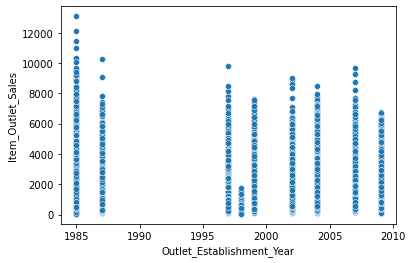

In [84]:
sns.scatterplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=train_df)

The older established markets have high sale comapred to new eshtablished shops

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

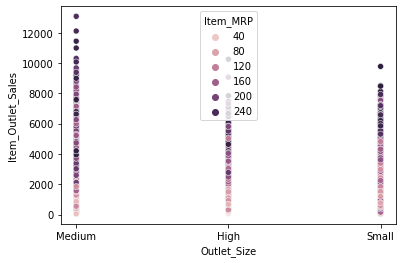

In [88]:
sns.scatterplot(x='Outlet_Size',y='Item_Outlet_Sales',hue='Item_MRP',data=train_df)

Medium out let have high number of sales

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

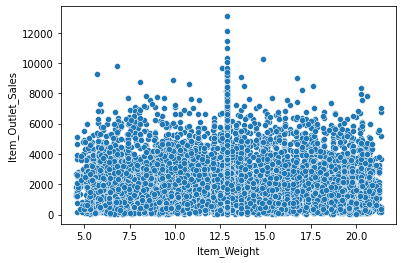

In [90]:
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',data=train_df)

Same importance of all items but some outliears are present

In [91]:
# Now find the co relation between the features 
cor = train_df.corr()
cor

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


<AxesSubplot:>

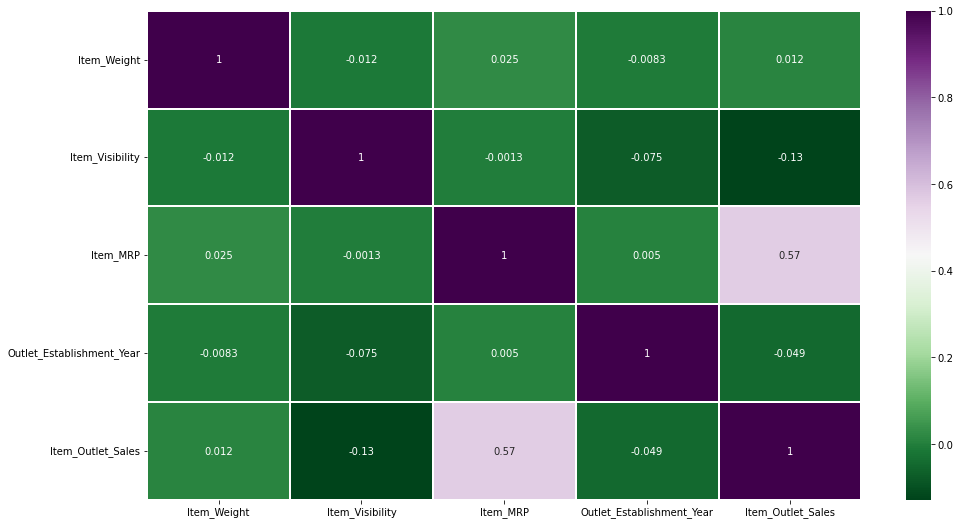

In [93]:
plt.figure(figsize=(16,9))
sns.heatmap(train_df.corr(),linewidths=.1, annot = True,cmap='PRGn_r')

This heat map contains both positive and negative correlation.

The feature Item_MRP is highly positively correlated with target variable Item_Outlet_Sales. The feature Item_Weight has very low positive correlation with target variable. The feature Item_Visibility and Outlet_Establishment_Year have very low negative correlation with the target variable. We can also observe there is very less correlation between the features.

In [94]:
cor['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.011550
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

In [95]:
#Visualizing the correlation between label and features using bar plot

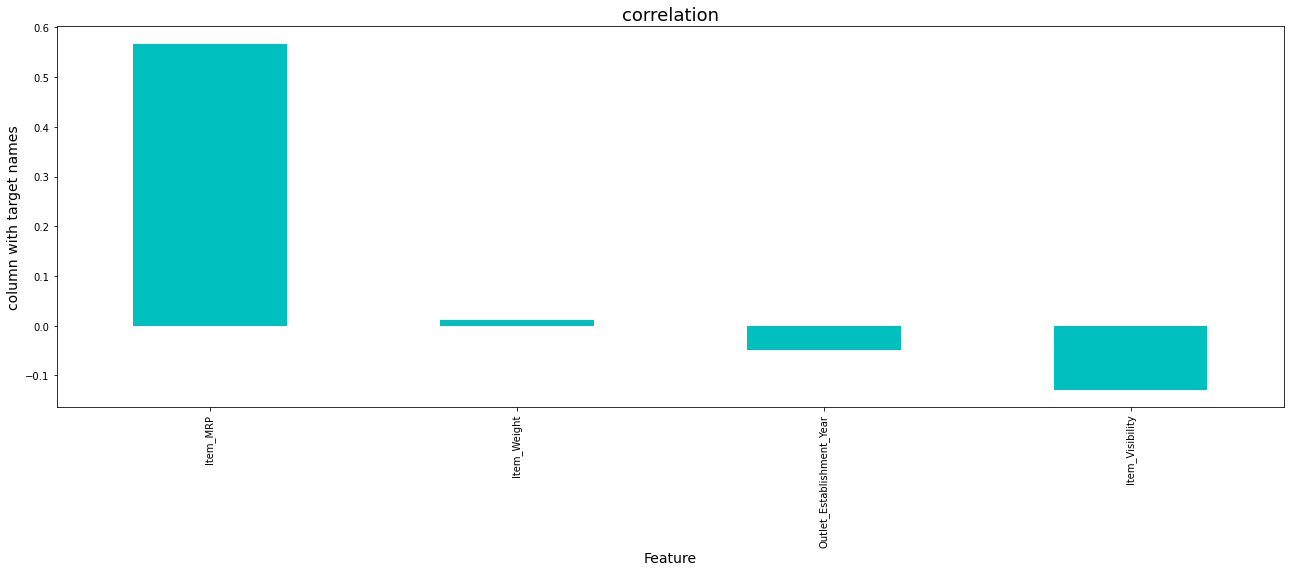

In [96]:
plt.figure(figsize=(22,7))
train_df.corr()['Item_Outlet_Sales'].sort_values(ascending=False).drop(['Item_Outlet_Sales']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

# Now we can find the outliers


<AxesSubplot:>

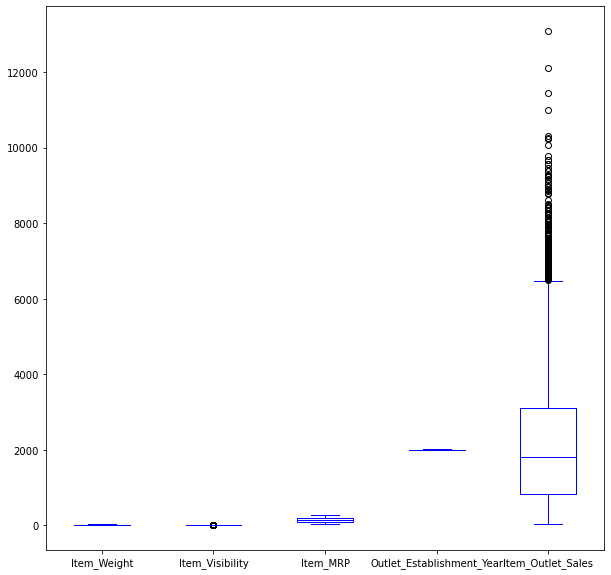

In [99]:
train_df.plot(kind="box", figsize=(10,10), color="b",vert=True)

The columns Item_Visibility and Item_Outlet_Sales have outliers. Since Item_Outlet_Sales is our label so no need to remove outliers. Ler's remove outliers in Item_Visibility.



<AxesSubplot:xlabel='Item_Visibility'>

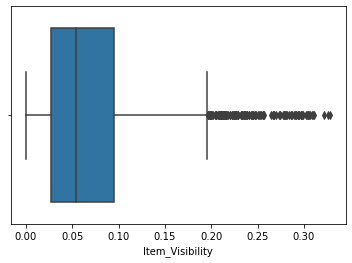

In [102]:
sns.boxplot(train_df["Item_Visibility"],orient='h')

In [103]:
# Remove the outlier using zscore
train_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [104]:
variable = train_df[['Item_Visibility']]

In [105]:
from scipy.stats import zscore

z=np.abs(zscore(variable))

z

,Item_Visibility
0,0.970732
1,0.908111
2,0.956917
3,1.281758
4,1.281758
...,...
8518,0.181193
8519,0.371154
8520,0.599784
8521,1.532880


In [137]:
new_df = train_df[(z<3).all(axis=1)]
new_df.shape

(8428, 12)

In [138]:
train_df.shape

(8523, 12)

In [139]:
#% of data loss is 
(8523-8428)/8523*100

1.1146309984747156

only 1 percent of data is lost

In [140]:
# Now we can do same using IQR method and check the data loss
Q1=variable.quantile(0.25)#1st Quqntile
Q3=variable.quantile(0.75)#3rd Quantile
IQR=Q3-Q1

In [141]:
iqr_df=train_df[~((train_df < (Q1 - 1.5 * IQR)) |(train_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [142]:
iqr_df.shape

(8379, 12)

So here the dat loss is high so we will use zscore method

# Now let us check the skewness of our data

In [143]:
new_df.skew()

Item_Weight                  0.089907
Item_Visibility              0.795956
Item_MRP                     0.128945
Outlet_Establishment_Year   -0.409186
Item_Outlet_Sales            1.173070
dtype: float64

slight High skewness is on Item_Visibility so we will deal with that

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

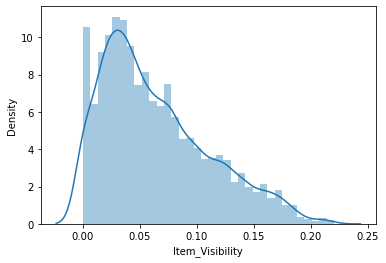

In [144]:
sns.distplot(new_df['Item_Visibility'])

In [145]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [146]:
feature = ["Item_Visibility"]
new_df[feature] = scaler.fit_transform(new_df[feature].values)

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

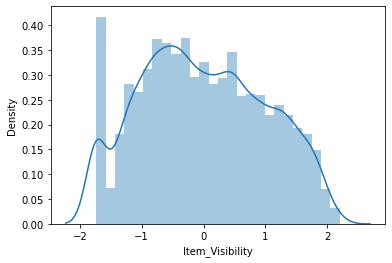

In [147]:
sns.distplot(new_df['Item_Visibility'])

Now the skewness has been removed

In [148]:
new_df.skew()

Item_Weight                  0.089907
Item_Visibility              0.115444
Item_MRP                     0.128945
Outlet_Establishment_Year   -0.409186
Item_Outlet_Sales            1.173070
dtype: float64

# Encoding the data


In [150]:
# Before that we can remove some items that are no that much relevent from our data
new_df=new_df.drop(['Item_Identifier','Outlet_Identifier'],axis=1)

In [151]:
# We are no seperating the coulumns with object data types
cols = [ "Item_Fat_Content", "Item_Type", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"]

In [152]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[cols]= new_df[cols].apply(LE.fit_transform)

In [153]:
new_df[cols].head()

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0,4,1,0,1
1,1,14,1,2,2
2,0,10,1,0,1
3,1,6,1,2,0
4,0,9,0,2,1


# Now Processing the data
Separating the independent and target variables into x and y

In [154]:
x=new_df.drop('Item_Outlet_Sales',axis=1)
y=new_df['Item_Outlet_Sales']

In [155]:
# now we can scale the data
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x = pd.DataFrame(mms.fit_transform(x), columns=x.columns)
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.282525,0.0,0.150584,0.266667,0.927507,0.583333,0.5,0.0,0.333333
1,0.081274,1.0,0.178376,0.933333,0.072068,1.000000,0.5,1.0,0.666667
2,0.770765,0.0,0.156784,0.666667,0.468288,0.583333,0.5,0.0,0.333333
3,0.871986,1.0,0.000000,0.400000,0.640093,0.541667,0.5,1.0,0.000000
4,0.260494,0.0,0.000000,0.600000,0.095805,0.083333,0.0,1.0,0.333333
...,...,...,...,...,...,...,...,...,...
8423,0.137541,0.0,0.449370,0.866667,0.777729,0.083333,0.0,1.0,0.333333
8424,0.227746,1.0,0.386845,0.000000,0.326263,0.708333,0.5,0.5,0.333333
8425,0.359929,0.0,0.304215,0.533333,0.228492,0.791667,1.0,0.5,0.333333
8426,0.158083,1.0,0.831823,0.866667,0.304939,1.000000,0.5,1.0,0.666667


Modeling 

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [158]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = LinearRegression()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.5368288907553092  on Random_state  115


We are getting r2 score as 53% at ranndom state 115 now let us split agian using this random state.

So we will build our other models too


In [165]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=115)

In [166]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn import metrics

# Linear Regression

In [168]:
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))

# Mean Absolute Error
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predLR))

# Mean Squared Error 
print('Mean Squared error:',metrics.mean_squared_error(y_test, predLR))

# Root Mean Squared Error 
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predLR)))

R2_score: 0.5368288907553092
Mean Absolute Error: 891.3494771399268
Mean Squared error: 1418256.2661821619
Root Mean Squared Error: 1190.905649571855


# Random Forest Regressor


In [171]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predRFR))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predRFR))
print('Mean Squared error:',metrics.mean_squared_error(y_test, predRFR))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predRFR)))

R2_Score: 0.5832192689596056
Mean Absolute Error: 797.5019058979834
Mean Squared error: 1276206.2909881226
Root Mean Squared Error: 1129.6930074087043


# AdaBoost Regressor

In [172]:
# Checking R2 score for AdaBoost Regressor
ABR=AdaBoostRegressor()
ABR.fit(x_train,y_train)

# prediction
predABR=ABR.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predABR))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predABR))
print('Mean Squared error:',metrics.mean_squared_error(y_test, predABR)) 
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predABR)))

R2_Score: 0.4727910809116328
Mean Absolute Error: 1019.7291000667026
Mean Squared error: 1614343.680251408
Root Mean Squared Error: 1270.5682509221642


# GradientBoosting Regressor

In [173]:
# Checking R2 score for Stochastic GradientBoosting Regressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predGB))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predGB))
print('Mean Squared error:',metrics.mean_squared_error(y_test, predGB)) 
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predGB)))

R2_Score: 0.6149187225548393
Mean Absolute Error: 761.5850213689309
Mean Squared error: 1179140.7620752654
Root Mean Squared Error: 1085.8824807847604


# KNN Regressor


In [175]:
# Checking R2 score for Stochastic KNN Regressor
knn=KNN()
knn.fit(x_train,y_train)
# prediction
predKNN=knn.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predKNN))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predKNN))
print('Mean Squared error:',metrics.mean_squared_error(y_test, predKNN)) 
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predKNN)))

R2_Score: 0.5433432469430993
Mean Absolute Error: 834.6034410913405
Mean Squared error: 1398308.9372165396
Root Mean Squared Error: 1182.501136243234


From these we can identify that Gradient boost provide greater accuracy now we will check cross value score to get best model

# Checking the cross validation score

In [176]:
from sklearn.model_selection import cross_val_score

In [177]:
# Checking cv score for Linear Regression
print(cross_val_score(LR,x,y,cv=5).mean())

0.5028516422361479


In [178]:
# Checking cv score for Random Forest Regression
print(cross_val_score(RFR,x,y,cv=5).mean())

0.5423708487403525


In [179]:
# Checking cv score for AdaBoost Regression
print(cross_val_score(ABR,x,y,cv=5).mean())

0.4579876867413647


In [181]:
# Checking cv score for GradientBoosting Regressor
print(cross_val_score(GB,x,y,cv=5).mean()) 


0.588727116542237


In [182]:
# Checking cv score for KNN
print(cross_val_score(knn,x,y,cv=5).mean())

0.5007555446287663


From the above observation, the difference between R2 score and the cross validation score we conclude that Gradient Boosting Regression  is our best fitting model

# Hyper parameter tuning


In [183]:
from sklearn.model_selection import GridSearchCV

In [188]:
param={'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
      'learning_rate':[0.1,0.2,.03,.04,.05],
       'n_estimators':[1,2,5,4,3],
      'criterion' : ['friedman_mse', 'squared_error', 'mse']
      
      }

In [189]:
GVC=GridSearchCV(GradientBoostingRegressor(),param,cv=5)

In [190]:
GVC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'learning_rate': [0.1, 0.2, 0.03, 0.04, 0.05],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'n_estimators': [1, 2, 5, 4, 3]})

In [191]:
GVC.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.2,
 'loss': 'squared_error',
 'n_estimators': 5}

In [193]:
#Initialising model with best parameters
Model=GradientBoostingRegressor(criterion= 'friedman_mse',learning_rate= 0.2,loss='squared_error',n_estimators= 5)

In [195]:
Model.fit(x_train, y_train)
pred = Model.predict(x_test)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R2_Score:',r2_score(y_test,pred)*100)

RMSE value: 1234.8442282468623
R2_Score: 50.20209145504035


# Saving the model

In [196]:
import joblib
joblib.dump(Model,"Big_Data_Mart_Sales.pkl")

['Big_Data_Mart_Sales.pkl']

# Now We will check the test data

In [197]:
test_df=pd.read_csv("bigdatamart_Test.csv")

In [198]:
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [199]:
test_df.shape

(5681, 11)

So there are 11 features are given.

In [200]:
test_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [203]:
# as we did in train data we will remove columns with name Item_Identifier,Item_Identifier
test_df=test_df.drop(['Item_Identifier','Outlet_Identifier'],axis=1)

In [204]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                4705 non-null   float64
 1   Item_Fat_Content           5681 non-null   object 
 2   Item_Visibility            5681 non-null   float64
 3   Item_Type                  5681 non-null   object 
 4   Item_MRP                   5681 non-null   float64
 5   Outlet_Establishment_Year  5681 non-null   int64  
 6   Outlet_Size                4075 non-null   object 
 7   Outlet_Location_Type       5681 non-null   object 
 8   Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 399.6+ KB


In [205]:
test_df.isnull().sum()

Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [207]:
# As we did in train data we will remove the Nan  with mean amd mode in Item_Weight and Outlet_Size respectevily
test_df['Item_Weight']=test_df['Item_Weight'].fillna(test_df['Item_Weight'].mean())

In [208]:
test_df['Outlet_Size']=test_df['Outlet_Size'].fillna(test_df['Outlet_Size'].mode()[0])

In [209]:
test_df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [210]:
# Statistical description of our data
test_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.245189,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.695633,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [211]:
#Now As we did in train data we will convert LF, low fat into Low Fat and also Reg to Regular in Item_Fat_Content
test_df["Item_Fat_Content"]=test_df["Item_Fat_Content"].replace('LF','Low Fat')
test_df["Item_Fat_Content"]=test_df["Item_Fat_Content"].replace('low fat','Low Fat')
test_df["Item_Fat_Content"]=test_df["Item_Fat_Content"].replace('reg','Regular')

# Identifying the outliers

<AxesSubplot:>

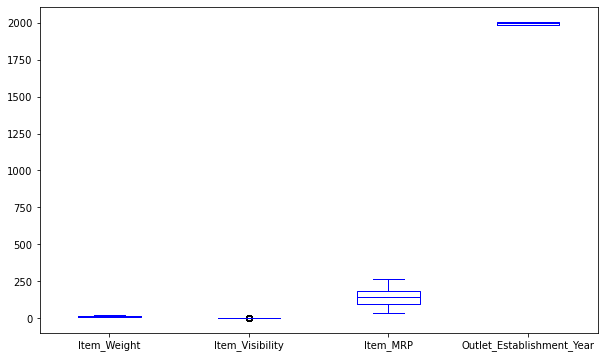

In [212]:
test_df.plot(kind="box", figsize=(10,6), color="b",vert=True)

like train data there is outliers in  Item_Visibility so we will deal with Zscore

<AxesSubplot:xlabel='Item_Visibility'>

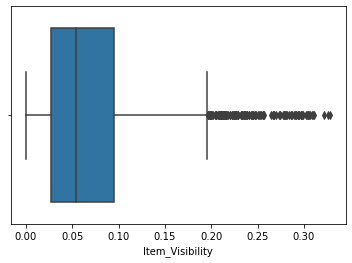

In [213]:
sns.boxplot(train_df["Item_Visibility"],orient='h')

In [214]:
from scipy.stats import zscore

In [217]:
z=np.abs(zscore(test_df[["Item_Visibility"]]))
new_df2=test_df[(z<3).all(axis=1)]
new_df2.shape

(5600, 9)

# Checking Skewness and dealing the same

In [218]:
new_df2.skew()

Item_Weight                  0.140901
Item_Visibility              0.787861
Item_MRP                     0.133061
Outlet_Establishment_Year   -0.411451
dtype: float64

Like Train we have high skewness in Item Visibility

In [221]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
new_df2[['Item_Visibility']] = scaler.fit_transform(new_dff[['Item_Visibility']].values)

In [222]:
new_df2.skew()

Item_Weight                  0.140901
Item_Visibility              0.007428
Item_MRP                     0.133061
Outlet_Establishment_Year   -0.411451
dtype: float64

Now we have reduced he skewness 

In [226]:
# Now we will use label endocer to encode the data where data type is object
colm=[ 'Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [227]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df2[colm]= new_df2[colm].apply(LE.fit_transform)

# Scaling the data using standardScallar


In [228]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
new_df2 = pd.DataFrame(ss.fit_transform(new_df2), columns=new_df2.columns)
new_df2.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1.888840,-0.738413,-1.491332,1.363909,-0.538563,0.128501,-0.276176,-1.377862,-0.277213
1,-1.032779,1.354256,-0.416584,-0.767463,-0.871149,1.085897,-0.276176,-0.142507,-0.277213
2,0.445631,-0.738413,0.930133,0.890271,1.629171,0.008826,-0.276176,1.092848,-1.544474
3,-1.263927,-0.738413,-1.185971,1.363909,0.225158,1.085897,-0.276176,-0.142507,-0.277213
4,-0.001263,1.354256,1.214267,-0.767463,1.507359,-1.546944,-0.276176,1.092848,2.257309


Now let's load our saved model again and use the TEST data for predicting the values.


In [229]:
import joblib

model = joblib.load("Big_Data_Mart_Sales.pkl")

In [230]:
prediction = model.predict(new_df2)

In [234]:
predict=pd.DataFrame(prediction,columns=['Item_Outlet_Sales'])
predict

,Item_Outlet_Sales
0,1002.639392
1,1002.639392
2,1073.956021
3,1115.954400
4,4230.121677
...,...
5595,1002.639392
5596,2368.220634
5597,1002.639392
5598,1127.360749


These are the predicted values for the test data provide, There are 5600 values


In [235]:
# We can save the same in to csv file
predict.to_csv('Item_Outlet_Sales.csv',index=False)